In [1]:
import datetime
import os

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

from scipy.integrate import odeint

In [2]:
data_filepath = './data/andorra_covid_cases - Andorra_COVID_cases_data.csv'

cases_df = pd.read_csv(data_filepath,
                     # parse_dates=['date'],
                      ).fillna(0).sort_index()
cases_df['date'] = pd.to_datetime(cases_df['date'])
cases_df.describe()

,Total cases,Recovered,Active cases,Cases needing Hospital care,Cases in UCI,Deaths
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,438.035088,138.438596,279.438596,29.140351,10.649123,20.140351
std,286.330788,176.025264,174.780272,17.865008,6.704186,17.014110
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,133.000000,1.000000,111.000000,13.000000,2.000000,1.000000
50%,526.000000,31.000000,322.000000,33.000000,14.000000,21.000000
75%,717.000000,248.000000,442.000000,45.000000,16.000000,36.000000
max,762.000000,652.000000,504.000000,55.000000,19.000000,51.000000


# Simple SEIR with constant transmissibility (R)

In [3]:
S0, E0, I0, R0 = 77000, 0, 1, 0
N=sum([S0, E0, I0, R0])

beta = 1 # trasmissions per day (days^-1)
gamma = 1/5 # rate at which infected people recover (days^-1)
delta = 1/5 # rate at which exposed people become infectious (days^-1)

In [4]:
def derivatives(y, t, N, beta, gamma, delta):
    """ Calculate the derivatives of the SEIR model"""
    S, E, I, R = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - delta * E
    dIdt = delta * E - gamma * I
    dRdt = gamma * I
    return dSdt, dEdt, dIdt, dRdt

In [5]:
t = list(range(57))
y0 = S0, E0, I0, R0 # Initial conditions vector

# Integrate the SEIR equations over the grid.
result = odeint(derivatives, y0, t, args=(N, beta, gamma, delta))
S, E, I, R = result.T

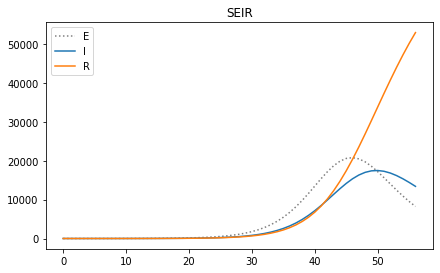

In [6]:
cases_df['S']=S
cases_df['E']=E
cases_df['I']=I
cases_df['R']=R

cases_df['E'].plot(title="SEIR",
               c='k',
               linestyle=':',
               alpha=.5,
               label='E',
               legend=True,
             figsize=(500/72, 300/72))

# ax = cases_df['E'].plot(label='E',
#                    legend=True)
ax = cases_df['I'].plot(label='I',
                   legend=True)
ax = cases_df['R'].plot(label='R',
                   legend=True)
ax.get_figure().set_facecolor('w')

## With time varying transimissibility based on contact intensity (synthetic)

In [7]:
beta_contact=1/20

contact_intensity_start, k, x0, contact_intensity_end = 20, 0.5, 15, 1

def synthetic_contact_intensity(t):
    # logistic function to synthesize contact intensity data
    return (contact_intensity_start-contact_intensity_end) / (1 + np.exp(-k*(-t+x0))) + contact_intensity_end

def beta(t):
    return synthetic_contact_intensity(t) * beta_contact

def derivatives(y, t, N, beta, gamma, delta):
    """ Calculate the derivatives of the SEIR model"""
    S, E, I, R = y
    dSdt = -beta(t) * S * I / N
    dEdt = beta(t) * S * I / N - delta * E
    dIdt = delta * E - gamma * I
    dRdt = gamma * I
    return dSdt, dEdt, dIdt, dRdt

In [8]:
t = list(range(57))
y0 = S0, E0, I0, R0 # Initial conditions vector

# Integrate the SEIR equations over the time grid, t.
result = odeint(derivatives, y0, t, args=(N, beta, gamma, delta))
S, E, I, R = result.T

In [9]:
cases_df['contact_intensity'].plot(title="Synthetic Contact Intensity",
               c='b',
               linestyle='-',
               alpha=1,
               label='contact_intensity',
               legend=True,
             figsize=(500/72, 300/72))

KeyError: 'contact_intensity'

In [ ]:
cases_df['S']=S
cases_df['E']=E
cases_df['I']=I
cases_df['R']=R

cases_df['E'].plot(title="SEIR",
               c='k',
               linestyle=':',
               alpha=.5,
               label='E',
               legend=True,
             figsize=(500/72, 300/72))

# ax = cases_df['E'].plot(label='E',
#                    legend=True)
ax = cases_df['I'].plot(label='I',
                   legend=True)
ax = cases_df['R'].plot(label='R',
                   legend=True)
ax.get_figure().set_facecolor('w')